# Deep Learning
    

## Setup

We will use PyTorch. You can set this up with
```
conda create --name 8.s05_dl python=3.6
conda install numpy matplotlib scipy jupyter pytorch scikit-learn pandas
conda activate 8.s05_dl
``` 
(you can get out of the existing environment, if necessary, with `conda deactivate`).

Let's check that everything is working:

In [1]:
import torch
print(torch.__version__)

1.7.1


You should see the PyTorch version printed properly.

## Machine Learning

Machine learning (ML) broadly describes the methods by which computers are able to learn mathematical models to describe data. If this sounds a little familiar don't be surprised: ML at its core is fitting.

ML involves three main components:

- Model
    - chosen mathematical model (depends on the task / available data)
- Learning
    - estimate statistical model from data 
- Prediction/Inference
    - use statistical model to make predictions on new data points and infer properties

### Supervised Learning

Given N examples with features ${x_i\in X}$ and targets ${y_i\in Y}$, learn function mapping $h(x)=y$.

#### Classification

In classification tasks, $Y$ is a finite set of labels (i.e. classes). Can be:

- Binary classification ($Y={0,1}$) e.g. signal vs. background

- Multi-class classification $Y={c_1,c_2,...,c_n}$) e.g. is this particle an electron or pion or photon?
    - Multi-class labels are typically represented using "one-hot-encoding" or "one-hot-vectors": $y_i=(0,0,...,1,...,0)$ where the kth element is 1 and all other are 0 for class $c_k$.

#### Regression

In regression tasks, $Y$ is the real numbers

#### Procedure

- Design a function (model) with adjustable parameters
- Design a loss function
- Find best parameters which minimize loss
    - Use a labeled *training-set* to compute loss
    - Adjust parameters to reduce loss function
    - Repeat until parameters stabilize (minima)
- Estimate final performance on *test-set*


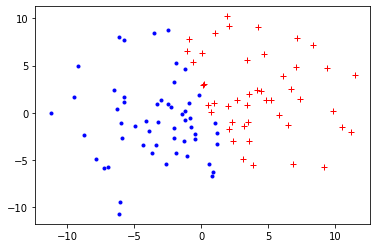

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#define points
x1 = np.random.normal(0, 5, 100) #mean, sigma, num_points
x2 = np.random.normal(0, 5, 100)

noise = 0. #sets the noise scale
x1noise = np.random.normal(0, noise, 100)
x2noise = np.random.normal(0, noise, 100)

mask_pos = x2 > (2. - 3.*x1)
mask_neg = x2 <= (2. - 3.*x1)

x1 = x1 + x1noise
x2 = x2 + x2noise

# lets define a true boundary between the two classes
# by x_2 = 2 - 3 x_1
x1_pos = x1[mask_pos]
x2_pos = x2[mask_pos]
x1_neg = x1[mask_neg]
x2_neg = x2[mask_neg]

#look at things
plt.plot(x1_pos, x2_pos, 'r+')
plt.plot(x1_neg, x2_neg, 'b.')

plt.show()

#### Ex. 1 : Perceptron Algorithm

Basic classification: two inputs, two classes

Linear model: $f(x|w,b) = \textrm{sign}(w^{T}x+b)$

Loss: $L_i = \textrm{max}[0,-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$

Issue: No way to distinguish two solutions. Is $x_2 = 2 - 3.001 x_1$ a better solution that $x_2 = 2 - 3 x_1$ in this case?

In [4]:
def perceptron_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = np.sign(x[0][i]*w[0]+x[1][i]*w[1]+b)
        loss = loss + max(0.,-1.*y[i]*fm)
    return loss

x_list = [np.concatenate((x1_pos,x1_neg)),np.concatenate((x2_pos,x2_neg))]
y_list = [1.]*len(x1_pos) + [-1.]*len(x1_neg)

print("Perceptron loss (w1=3, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.))
print("Perceptron loss (w1=3, w2=1, b=-1.9)")
print(perceptron_loss(x_list,y_list,[3.,1.],-1.9))
print("Perceptron loss (w1=3, w2=1, b=-2.1)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.1))

Perceptron loss (w1=3, w2=1, b=-2)
0.0
Perceptron loss (w1=3, w2=1, b=-1.9)
1.0
Perceptron loss (w1=3, w2=1, b=-2.1)
0.0


#### Ex. 2 : Support Vector Machine

Similar to perceptron algorithm, modify loss to select maximally discriminant parameters:

Linear model: $f(x|w,b) = w^{T}x+b$
Classifier: $\textrm{sign}(f(x|w,b))$

Loss: $L_i = \textrm{max}[0,1-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$


In [5]:
def svm_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = x[0][i]*w[0]+x[1][i]*w[1]+b
        loss = loss + max(0.,1.-1.*y[i]*fm)
    return loss

print("SVM loss (w1=3, w2=1, b=-2)")
print(svm_loss(x_list,y_list,[3.,1.],-2.))
print("SVM loss (w1=3, w2=1, b=-1.9)")
print(svm_loss(x_list,y_list,[3.,1.],-1.9))
print("SVM loss (w1=3, w2=1, b=-2.1)")
print(svm_loss(x_list,y_list,[3.,1.],-2.1))

SVM loss (w1=3, w2=1, b=-2)
3.5149843536511494
SVM loss (w1=3, w2=1, b=-1.9)
3.7149843536511495
SVM loss (w1=3, w2=1, b=-2.1)
3.314984353651149


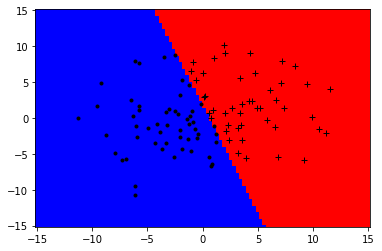

In [6]:
#create grid
x1_list = np.linspace(-15., 15., 100)
x2_list = np.linspace(-15., 15., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)

#fill with model value
h_grid = np.sign(x2_grid - (2. - 3.*x1_grid))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

Better... but what we really want is a probabilistic model. For data points we haven't seen, and more complex data, we want the algorithm to produce its confidence in the prediction.


#### Ex. 3 : Logistic regression

Change from \[-1,1\] to \[0,1\] for simplicity

Model: $f(x|w,b)=\frac{1}{1+e^{-(w^{T}x+b)}}$

Loss: $L_i = y_i \log(f(x_i|w,b)) + (1-y_i)\log(1-f(x_i|w,b))$
    (Known as *Binary Cross Entropy*)

In [7]:
#switch to [0,1] from [-1,1]

y_list_0 = [1.]*len(x1_pos) + [0.]*len(x1_neg)

def lr_loss(x,y,w,b,scale=1.):
    loss = 0.
    for i in range(len(x[0])):
        expon = -1.*scale*(x[0][i]*w[0]+x[1][i]*w[1]+b)
        if (expon > 99.):
            expon = 99.
        fm = 1./(1.+np.exp(expon))
        if (fm < 1. and fm > 0.):
            loss = loss - y[i]*np.log(fm) - (1.-y[i])*np.log(1.-fm)
    return loss

print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.))
print("Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-1.9))
print("Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.1))
print("")
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.,1.5))
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2,0.5))

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]
5.004639976586655
Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]
5.016784631162464
Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]
5.02180795783352

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]
3.4889052814963937
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]
9.093450204141783


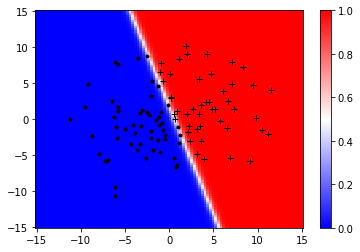

In [8]:
#fill with model value
h_grid = 1./(1.+np.exp(-1.*1.5*(x2_grid - (2. - 3.*x1_grid))))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

This is a neural network! No hidden layers, two inputs, one output neuron with a sigmoid activation.

https://playground.tensorflow.org/

How do we train? How do we handle more complicated data?

In [9]:
import h5py
import pandas as pd

treename = 'l1pf_egm_reg'

VARS = ['pt', 'eta', 'phi', 'energy',
  'e2x2', 'e2x5', 'e3x5', 'e5x5', 'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'hoE', 'bremStrength', 'ecalIso', 'crystalCount',#4
  'lowerSideLobePt','upperSideLobePt',#2
  'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p',#4
  'sihih','sipip','sigetaeta','sigphiphi','sigetaphi',#5
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
  'gen_match']

filename = 'xtalTuple_TTbar_PU0.z'

h5file = h5py.File(filename, 'r') # open read-only
params = h5file[treename][()]

df = pd.DataFrame(params,columns=VARS)

TODROP = [
  'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
]

df = df.drop(TODROP, axis=1) #remove custom variables

for ie in ['e2x2', 'e2x5', 'e3x5', 'e5x5']:
    df[ie] /= df['energy']


df['isPU'] = pd.Series(df['gen_match']==0, index=df.index, dtype='i4')
df['isEG'] = pd.Series(df['gen_match']==1, index=df.index, dtype='i4')

MINPT = 0.5
MAXPT = 100.
df = df.loc[(df['pt']>MINPT) & (df['pt']<MAXPT) & (abs(df['eta'])<1.3)]
df.fillna(0., inplace=True)

df0 = df[df['gen_match']==0].head(100000)
df1 = df[df['gen_match']==1].head(10000)

df = pd.concat([df0, df1], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

print(df)
print(sum(df['gen_match']==0))
print(sum(df['gen_match']==1))


               pt       eta       phi     energy      e2x2      e2x5  \
0        9.300447  0.562497 -2.068368  10.811000  0.455522  0.576269   
1        8.161229  1.274687  1.202029  15.739336  0.521141  0.719788   
2       10.430792 -0.321179  2.764016  10.973431  0.622895  0.731023   
3       29.789146 -1.010229  1.257540  46.327565  0.343663  0.566577   
4        8.653561  0.889222  2.906474  12.306274  0.722242  0.722242   
...           ...       ...       ...        ...       ...       ...   
109995  24.549442 -0.311087 -2.256032  25.746938  0.794319  0.794319   
109996   8.326302 -0.296077  2.109135   8.693924  0.720612  0.720612   
109997   9.949767 -0.330532  1.519331  10.498245  0.389316  0.539213   
109998   8.159748 -0.782029  1.457238  10.784657  0.458542  0.458542   
109999   8.325585 -1.029417  2.648791  13.140473  0.659903  0.720608   

            e3x5      e5x5       hoE  bremStrength  ...  phiStripContiguous3p  \
0       0.576269  1.117082  5.272871      0.703978  ..

['pt', 'eta', 'phi', 'energy', 'e2x2', 'e2x5', 'e3x5', 'e5x5', 'hoE', 'bremStrength', 'ecalIso', 'crystalCount', 'lowerSideLobePt', 'upperSideLobePt', 'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p', 'sihih', 'sipip', 'sigetaeta', 'sigphiphi', 'sigetaphi', 'gen_match', 'isPU', 'isEG']


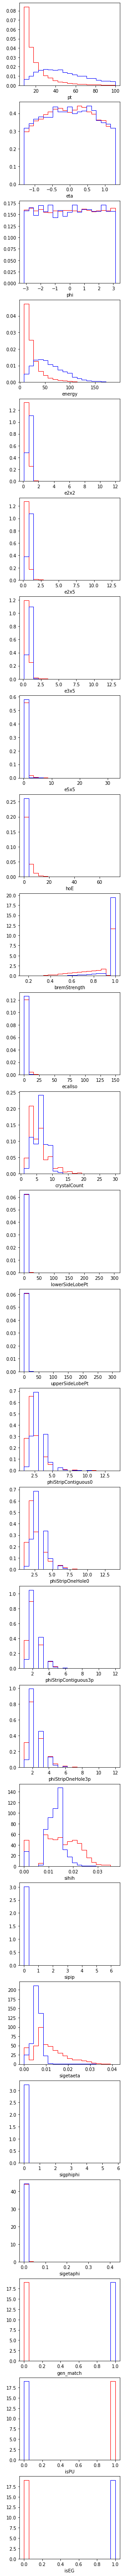

In [10]:
col_names = list(df.columns)
print(col_names)

fig, axs = plt.subplots(len(col_names),1,figsize=(4,4*len(col_names)))
for ix,ax in enumerate(axs):
    ax.hist(df[col_names[ix]][df['gen_match']==0],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='r',density=True)
    ax.hist(df[col_names[ix]][df['gen_match']==1],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='b',density=True)
    ax.set_xlabel(col_names[ix])

plt.show()

In [11]:
fig, axs = plt.subplots(len(col_names)-4,len(col_names)-4,figsize=(8*len(col_names),8*len(col_names)))
for ix in range(len(col_names)-3):
    for iy in range(ix):
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==0],df[col_names[iy]][df['gen_match']==0],'r+')
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==1],df[col_names[iy]][df['gen_match']==1],'b.')
        axs[ix-1,iy].set_xlabel(col_names[ix])
        axs[ix-1,iy].set_ylabel(col_names[iy])

plt.show()

Lets make a simple logistic regression network on this data to differentiate between pileup data (PU) and electron and photons (EG).

An important component of training a neural network is preparing the input. It is typical to split the data you have into different sets. Three are common: "training", "testing", and "validation".
Here we use 30% of the data for testing and 70% for training and validation, with that data split 80%/20% for training/validation.
PyTorch uses `dataloaders` which help handle batching, etc.

In [12]:
dataset = df.values

X = dataset[:,4:-3]
#last 3 columns are labels
ninputs = len(list(df.columns))-3-4

Y = dataset[:,-1:]
#last column will be used for the label

test_frac = 0.3
val_frac = 0.2

torch.random.manual_seed(42) # fix a random seed for reproducibility
alldataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32))

testdataset, trainvaldataset = torch.utils.data.random_split(
    alldataset, [int(len(Y)*test_frac),
              int(len(Y)*(1-test_frac))])

traindataset, valdataset = torch.utils.data.random_split(
    trainvaldataset, [int(len(Y)*(1.-test_frac)*(1.-val_frac)),
              int(len(Y)*(1.-test_frac)*val_frac)])

testloader = torch.utils.data.DataLoader(testdataset,
                                          num_workers=6,
                                          batch_size=500,
                                          shuffle=False)
trainloader = torch.utils.data.DataLoader(traindataset,
                                          num_workers=6,
                                          batch_size=500,
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valdataset,
                                        num_workers=6,
                                        batch_size=500,
                                        shuffle=False)


Now we define our network architecture and the connections. Lets start with the kind of logistic regression network we saw already.

PyTorch requires that we first define the layers we want to use in `__init__()` (here we build using standard library layers), and then we define the connection in `forward()`. This setup will allow PyTorch to construct the backward pass automatically, although for more complex or specialized networks it is possible to define the backward pass manually.

In [16]:
class LR_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.output(x)
        return x
    

model_lr = LR_net()
print(model_lr)
print('----------')
print(model_lr.state_dict())

LR_net(
  (fc1): Linear(in_features=19, out_features=1, bias=True)
  (output): Sigmoid()
)
----------
OrderedDict([('fc1.weight', tensor([[-0.0356,  0.0512, -0.0712, -0.0528,  0.0147,  0.0641,  0.1042, -0.2066,
         -0.1127, -0.1134,  0.1035,  0.1821, -0.0583, -0.1537, -0.2225, -0.1716,
          0.0258, -0.0026,  0.2214]])), ('fc1.bias', tensor([0.0843]))])


Now lets train! We do this using the `Adam` optimizer and binary cross entropy loss (as before).

In [17]:
criterion = torch.nn.BCELoss()
optimizer_lr = torch.optim.Adam(model_lr.parameters(), lr=0.003) 

history_lr = {'loss':[], 'val_loss':[]}

for epoch in range(20):

    current_loss = 0.0 #rezero loss
    
    for i, data in enumerate(trainloader):

        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_lr.zero_grad()

        # forward + backward + optimize (training magic)
        # This will use the pytorch autograd feature to adjust the
        ## parameters of our function to minimize the loss
        outputs = model_lr(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_lr.step()
        
        # add loss statistics
        current_loss += loss.item()
        
        if i == len(trainloader)-1:
            current_val_loss = 0.0
            with torch.no_grad():#disable updating gradient
                for iv, vdata in enumerate(valloader):
                    val_inputs, val_labels = vdata
                    val_loss = criterion(model_lr(val_inputs), val_labels)
                    current_val_loss += val_loss.item()
            print('[%d, %4d] loss: %.4f  val loss: %.4f' % 
                  (epoch + 1, i + 1, current_loss/float(i+1) , current_val_loss/float(len(valloader))))

            history_lr['loss'].append(current_loss/float(i+1))
            history_lr['val_loss'].append(current_val_loss/float(len(valloader)))
            
print('Finished Training')
torch.save(model_lr.state_dict(), 'lr_model.pt')
print(model_lr.state_dict())

[1,  124] loss: 0.3151  val loss: 0.2642
[2,  124] loss: 0.2514  val loss: 0.2263
[3,  124] loss: 0.2257  val loss: 0.2073
[4,  124] loss: 0.2114  val loss: 0.1953
[5,  124] loss: 0.2015  val loss: 0.1861
[6,  124] loss: 0.1938  val loss: 0.1787
[7,  124] loss: 0.1869  val loss: 0.1726
[8,  124] loss: 0.1815  val loss: 0.1680
[9,  124] loss: 0.1774  val loss: 0.1635
[10,  124] loss: 0.1732  val loss: 0.1594
[11,  124] loss: 0.1703  val loss: 0.1558
[12,  124] loss: 0.1670  val loss: 0.1531
[13,  124] loss: 0.1647  val loss: 0.1495
[14,  124] loss: 0.1619  val loss: 0.1473
[15,  124] loss: 0.1600  val loss: 0.1456
[16,  124] loss: 0.1578  val loss: 0.1430
[17,  124] loss: 0.1571  val loss: 0.1410
[18,  124] loss: 0.1556  val loss: 0.1390
[19,  124] loss: 0.1550  val loss: 0.1381
[20,  124] loss: 0.1533  val loss: 0.1364
[21,  124] loss: 0.1520  val loss: 0.1348
[22,  124] loss: 0.1510  val loss: 0.1332
[23,  124] loss: 0.1495  val loss: 0.1322
[24,  124] loss: 0.1489  val loss: 0.1308
[

KeyboardInterrupt: 

Ok, how is the training doing? Lets visualize the evolution of the loss by epoch.

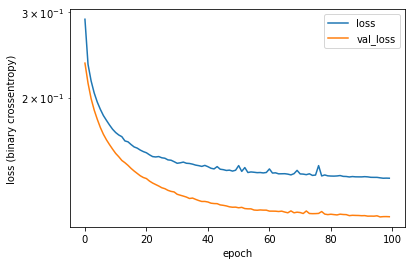

In [15]:
plt.semilogy(history_lr['loss'], label='loss')
plt.semilogy(history_lr['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

You may have heard of overtraining. Lets define a "stopping criteria" by using the validation loss. We will stop the training if the validation loss appears to have hit its minimum (but we will give it a few epochs to allow for local minimum or single-epoch spikes. There are other ways to define an early stopping criteria but this will do for now.

In [83]:
def train(model,trainloader,valloader,nepochs=100,lr=0.003,l2reg=0.,patience=5,name=None):

    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2reg) 

    history = {'loss':[], 'val_loss':[]}

    min_loss = 999999.
    min_epoch = 0
    min_model = model.state_dict()
    should_stop = False
    
    for epoch in range(nepochs):

        current_loss = 0.0 #rezero loss

        for i, data in enumerate(trainloader):

            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            # This will use the pytorch autograd feature to adjust the
            ## parameters of our function to minimize the loss
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            current_loss += loss.item()

            if i == len(trainloader)-1:
                current_val_loss = 0.0
                with torch.no_grad():#disable updating gradient
                    model.eval() #place model in evaluation state
                                ## necessary for some layer types (like dropout)
                    for iv, vdata in enumerate(valloader):
                        val_inputs, val_labels = vdata
                        val_loss = criterion(model(val_inputs), val_labels)
                        current_val_loss += val_loss.item()
                    model.train() #return to training state
                current_loss = current_loss/float(i+1)
                current_val_loss = current_val_loss/float(len(valloader))
                print('[%d, %4d] loss: %.4f  val loss: %.4f' % 
                      (epoch + 1, i + 1, current_loss , current_val_loss))

                if current_val_loss < min_loss:
                    min_loss = current_val_loss
                    min_model = model.state_dict()
                    min_epoch = epoch
                elif epoch-min_epoch==5:
                    model.load_state_dict(min_model)
                    should_stop = True
                    break

                history['loss'].append(current_loss)
                history['val_loss'].append(current_val_loss)
                
            if should_stop:
                break

    print('Finished Training')
    if name is not None:
        torch.save(model.state_dict(), '%s.pt'%name)
    return history

In [84]:
history_lr = train(model_lr,trainloader,valloader,name='lr_model')

[1,   62] loss: 0.1352  val loss: 0.1535
[2,   62] loss: 0.1349  val loss: 0.1530
[3,   62] loss: 0.1343  val loss: 0.1525
[4,   62] loss: 0.1341  val loss: 0.1525
[5,   62] loss: 0.1339  val loss: 0.1522
[6,   62] loss: 0.1332  val loss: 0.1518
[7,   62] loss: 0.1336  val loss: 0.1520
[8,   62] loss: 0.1333  val loss: 0.1516
[9,   62] loss: 0.1328  val loss: 0.1513
[10,   62] loss: 0.1328  val loss: 0.1511
[11,   62] loss: 0.1327  val loss: 0.1509
[12,   62] loss: 0.1323  val loss: 0.1508
[13,   62] loss: 0.1322  val loss: 0.1506
[14,   62] loss: 0.1320  val loss: 0.1505
[15,   62] loss: 0.1319  val loss: 0.1503
[16,   62] loss: 0.1319  val loss: 0.1503
[17,   62] loss: 0.1318  val loss: 0.1502
[18,   62] loss: 0.1320  val loss: 0.1500
[19,   62] loss: 0.1322  val loss: 0.1499
[20,   62] loss: 0.1314  val loss: 0.1498
[21,   62] loss: 0.1312  val loss: 0.1495
[22,   62] loss: 0.1313  val loss: 0.1502
[23,   62] loss: 0.1311  val loss: 0.1496
[24,   62] loss: 0.1311  val loss: 0.1495
[

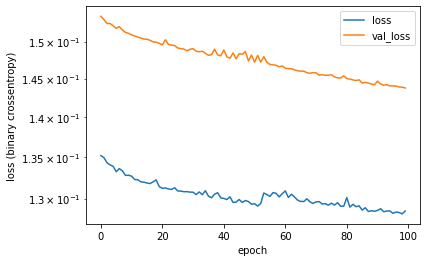

In [85]:
plt.semilogy(history_lr['loss'], label='loss')
plt.semilogy(history_lr['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

Now lets see how to apply this network to our test data. This is essentially the same setup we used for the validation data.

In [86]:
def apply(model, testloader):
    with torch.no_grad():
        model.eval()
        outputs = []
        labels = []
        for data in testloader:
            test_inputs, test_labels = data
            outputs.append(model(test_inputs).numpy())
            labels.append(test_labels.numpy())
        model.train()

        Y_test_predict = outputs
        Y_test = labels

    Y_test_predict = np.concatenate(Y_test_predict)
    Y_test = np.concatenate(Y_test)
    
    return Y_test_predict,Y_test

Y_test_predict_lr, Y_test = apply(model_lr, testloader)

print(Y_test_predict_lr.shape)
print(Y_test.shape)

(33000, 1)
(33000, 1)


And now lets plot the distribution of the output of the network. As we wanted, the PU (red) is peaked at 0, while the EG (red) is closer to 1. 

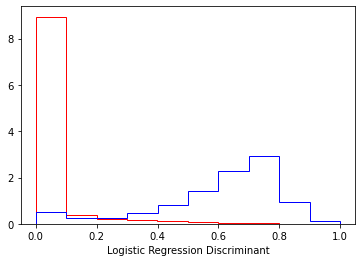

In [87]:
plt.hist(Y_test_predict_lr[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_lr[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('Logistic Regression Discriminant')
plt.show()

Ok, but a logistic regression is the simplest thing. What about hidden layers?

In [88]:
class MLP2_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,30)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(30,10)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.output(x)
        return x
    

model_mlp_2layer = MLP2_net()
print(model_mlp_2layer)

MLP2_net(
  (fc1): Linear(in_features=19, out_features=30, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


In [89]:
history_mlp_2layer = train(model_mlp_2layer,trainloader,valloader,name='mlp_2layer_model')
Y_test_predict_mlp_2layer, Y_test = apply(model_mlp_2layer, testloader)

[1,   62] loss: 0.3454  val loss: 0.2195
[2,   62] loss: 0.1749  val loss: 0.1506
[3,   62] loss: 0.1327  val loss: 0.1282
[4,   62] loss: 0.1227  val loss: 0.1199
[5,   62] loss: 0.1120  val loss: 0.1074
[6,   62] loss: 0.1029  val loss: 0.1022
[7,   62] loss: 0.0979  val loss: 0.0973
[8,   62] loss: 0.0945  val loss: 0.0952
[9,   62] loss: 0.0924  val loss: 0.0986
[10,   62] loss: 0.0912  val loss: 0.0930
[11,   62] loss: 0.0901  val loss: 0.1002
[12,   62] loss: 0.0890  val loss: 0.0972
[13,   62] loss: 0.0883  val loss: 0.0959
[14,   62] loss: 0.0882  val loss: 0.0954
[15,   62] loss: 0.0881  val loss: 0.0949
Finished Training


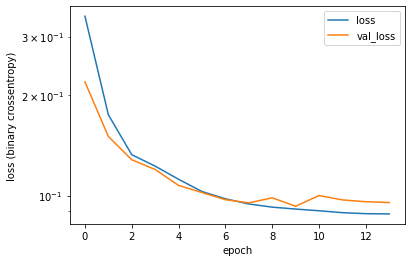

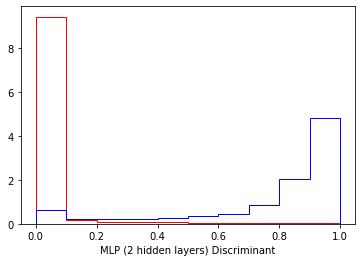

In [90]:
plt.semilogy(history_mlp_2layer['loss'], label='loss')
plt.semilogy(history_mlp_2layer['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

plt.hist(Y_test_predict_mlp_2layer[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_mlp_2layer[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('MLP (2 hidden layers) Discriminant')
plt.show()

This looks better than the logistic regression. But how would we establish that? A Receiver Operating Characteristic (ROC) curve is a typical way to compare multiple algorithms. Basically we are going to make a requirement on the NN output: if it is below a given value we will call it PU, and if it is above that value its EG. Then we compute how good this is at predicting the true labels. We can scan this value between 0 and 1 and then plot each point.

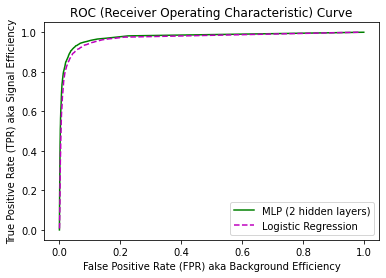

In [91]:
def compute_ROC(labels, predicts, npts=101):
    cutvals = np.linspace(0.,1.,num=npts)
    tot0 = float(len(labels[labels==0]))
    tot1 = float(len(labels[labels==1]))
    tpr = []
    fpr = []
    for c in cutvals:
        fpr.append(float(len(predicts[(labels==0) & (predicts>c)]))/tot0)
        tpr.append(float(len(predicts[(labels==1) & (predicts>c)]))/tot1)
    
    return np.array(fpr),np.array(tpr)

mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

So the MLP we made is indeed a bit better, especially if we want to classify the background very well.

Lets try a larger network. 

In [92]:
class MLP3_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x
    

model_mlp_3layer = MLP3_net()
print(model_mlp_3layer)

MLP3_net(
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


Lets also try to use a form of regularization, in this case L2. If left unchecked, larger networks especially can begin to find and abuse certain subtle features that we perhaps don't want them to. The obvious case is if the feature is only present in the training set then we may be hurting ourselves by focusing on that. L2 regularization adds a "penalty term" to the loss function which is a function of the magnitude squared of the weight values. 

$\mathcal{L} = \mathcal{L}_\textrm{BCE} + \lambda\sum |W|^2$

We can control the relative importance of this term via the $\lambda$ parameter. By encouraging the network to keep the weights small, it is less able to magnify the importance of one particular feature/node.

In [93]:
history_mlp_3layer = train(model_mlp_3layer,trainloader,valloader,l2reg=0.0001,name='mlp_3layer_model')
Y_test_predict_mlp_3layer, Y_test = apply(model_mlp_3layer, testloader)

[1,   62] loss: 0.3272  val loss: 0.1821
[2,   62] loss: 0.1469  val loss: 0.1366
[3,   62] loss: 0.1295  val loss: 0.1264
[4,   62] loss: 0.1209  val loss: 0.1151
[5,   62] loss: 0.1148  val loss: 0.1130
[6,   62] loss: 0.1096  val loss: 0.1048
[7,   62] loss: 0.0966  val loss: 0.0917
[8,   62] loss: 0.0903  val loss: 0.0948
[9,   62] loss: 0.0910  val loss: 0.0868
[10,   62] loss: 0.0878  val loss: 0.0859
[11,   62] loss: 0.0864  val loss: 0.0886
[12,   62] loss: 0.0858  val loss: 0.0849
[13,   62] loss: 0.0859  val loss: 0.0856
[14,   62] loss: 0.0852  val loss: 0.0873
[15,   62] loss: 0.0841  val loss: 0.0862
[16,   62] loss: 0.0842  val loss: 0.0855
[17,   62] loss: 0.0835  val loss: 0.0833
[18,   62] loss: 0.0832  val loss: 0.0833
[19,   62] loss: 0.0849  val loss: 0.0926
[20,   62] loss: 0.0828  val loss: 0.0839
[21,   62] loss: 0.0835  val loss: 0.0893
[22,   62] loss: 0.0822  val loss: 0.0887
Finished Training


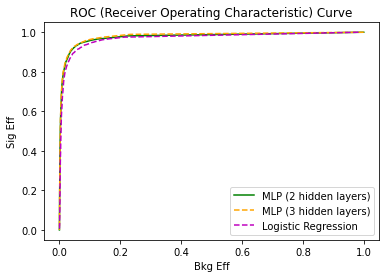

In [94]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("Bkg Eff")
plt.ylabel("Sig Eff")
plt.legend(loc="lower right")
plt.show()

Its hard to tell... Luckily we are not required to plot $\epsilon_{s}$ and $\epsilon_{b}$. Lets use $1/\epsilon_{b}$ instead of $\epsilon_{b}$ to really bring out the behavior for low $\epsilon_{b}$.

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


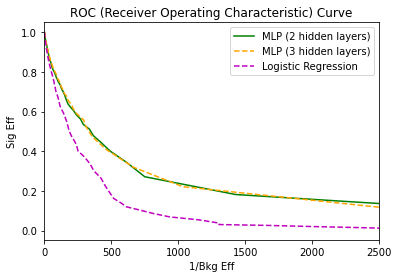

In [95]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer,101)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer,101)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr,101)

plt.plot(1./mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(1./lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("1/Bkg Eff")
plt.xlim([-1, 2500])
plt.ylabel("Sig Eff")
plt.legend(loc="upper right")
plt.show()

Lets try two other types of regularizer to finish: *batch normalization* and *dropout*.

Batch normalization works by rescaling each input such that the mean and standard deviation are 0 and 1, respectively. This helps make sure that each node has similar values when it is passed to the following layer.

Dropout works by randomly removing a given fraction of the nodes in a layer each training pass. This helps ensure that no one node becomes crucially important to the final result.

In [105]:
class MLP3_BN_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0 = torch.nn.BatchNorm1d(ninputs)
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(50)
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.bn2 = torch.nn.BatchNorm1d(30)
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.bn3 = torch.nn.BatchNorm1d(10)
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.bn0(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.bn3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x
    
class MLP3_Drop_net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(ninputs,50)
        self.act1 = torch.nn.ReLU()
        self.drop1 = torch.nn.Dropout(0.1)
        self.fc2 = torch.nn.Linear(50,30)
        self.act2 = torch.nn.ReLU()
        self.drop2 = torch.nn.Dropout(0.1)
        self.fc3 = torch.nn.Linear(30,10)
        self.act3 = torch.nn.ReLU()
        self.drop3 = torch.nn.Dropout(0.1)
        self.fc4 = torch.nn.Linear(10,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.drop1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.drop2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.drop3(x)
        x = self.fc4(x)
        x = self.output(x)
        return x

model_mlp_3layer_bn = MLP3_BN_net()
print(model_mlp_3layer_bn)

model_mlp_3layer_drop = MLP3_Drop_net()
print(model_mlp_3layer_drop)

MLP3_BN_net(
  (bn0): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (bn1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (bn2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act3): ReLU()
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)
MLP3_Drop_net(
  (fc1): Linear(in_features=19, out_features=50, bias=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (act2): ReLU()
  (drop2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (act

In [106]:
history_mlp_3layer_bn = train(model_mlp_3layer_bn,trainloader,valloader,name='mlp_3layer_bn_model')
Y_test_predict_mlp_3layer_bn, Y_test = apply(model_mlp_3layer_bn, testloader)

[1,   62] loss: 0.5871  val loss: 0.3857
[2,   62] loss: 0.2624  val loss: 0.1884
[3,   62] loss: 0.1579  val loss: 0.1649
[4,   62] loss: 0.1078  val loss: 0.1011
[5,   62] loss: 0.0912  val loss: 0.0875
[6,   62] loss: 0.0905  val loss: 0.0842
[7,   62] loss: 0.0835  val loss: 0.0880
[8,   62] loss: 0.0843  val loss: 0.0815
[9,   62] loss: 0.0812  val loss: 0.0806
[10,   62] loss: 0.0793  val loss: 0.0794
[11,   62] loss: 0.0807  val loss: 0.0804
[12,   62] loss: 0.0790  val loss: 0.0757
[13,   62] loss: 0.0781  val loss: 0.0748
[14,   62] loss: 0.0827  val loss: 0.0795
[15,   62] loss: 0.0775  val loss: 0.0770
[16,   62] loss: 0.0769  val loss: 0.0775
[17,   62] loss: 0.0760  val loss: 0.0761
[18,   62] loss: 0.0748  val loss: 0.0741
[19,   62] loss: 0.0737  val loss: 0.0759
[20,   62] loss: 0.0734  val loss: 0.0735
[21,   62] loss: 0.0743  val loss: 0.0735
[22,   62] loss: 0.0742  val loss: 0.0737
[23,   62] loss: 0.0735  val loss: 0.0744
[24,   62] loss: 0.0745  val loss: 0.0724
[

In [107]:
history_mlp_3layer_drop = train(model_mlp_3layer_drop,trainloader,valloader,name='mlp_3layer_drop_model')
Y_test_predict_mlp_3layer_drop, Y_test = apply(model_mlp_3layer_drop, testloader)

[1,   62] loss: 0.3178  val loss: 0.1960
[2,   62] loss: 0.1595  val loss: 0.1394
[3,   62] loss: 0.1252  val loss: 0.1195
[4,   62] loss: 0.1145  val loss: 0.1138
[5,   62] loss: 0.1076  val loss: 0.1118
[6,   62] loss: 0.1060  val loss: 0.1024
[7,   62] loss: 0.1011  val loss: 0.1040
[8,   62] loss: 0.0984  val loss: 0.1005
[9,   62] loss: 0.0971  val loss: 0.0979
[10,   62] loss: 0.0976  val loss: 0.0960
[11,   62] loss: 0.0950  val loss: 0.0956
[12,   62] loss: 0.0954  val loss: 0.0940
[13,   62] loss: 0.0947  val loss: 0.1001
[14,   62] loss: 0.0941  val loss: 0.0967
[15,   62] loss: 0.0935  val loss: 0.0950
[16,   62] loss: 0.0920  val loss: 0.0940
[17,   62] loss: 0.0931  val loss: 0.0956
[18,   62] loss: 0.0918  val loss: 0.0982
[19,   62] loss: 0.0914  val loss: 0.1013
[20,   62] loss: 0.0916  val loss: 0.0935
[21,   62] loss: 0.0907  val loss: 0.0953
[22,   62] loss: 0.0906  val loss: 0.0932
[23,   62] loss: 0.0898  val loss: 0.0924
[24,   62] loss: 0.0892  val loss: 0.0926
[

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


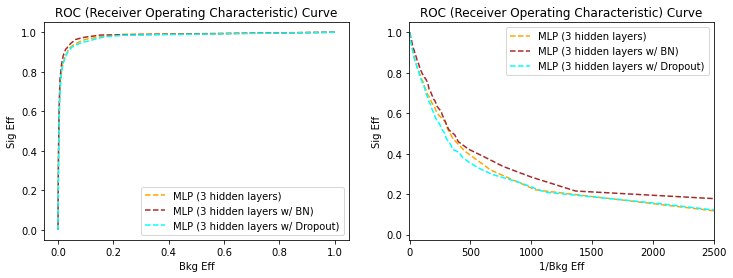

In [108]:
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer,101)
mlp_3layer_bn_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer_bn,101)
mlp_3layer_drop_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer_drop,101)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax1.plot(mlp_3layer_bn_rocpts[0],mlp_3layer_bn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ BN)")
ax1.plot(mlp_3layer_drop_rocpts[0],mlp_3layer_drop_rocpts[1],'--',color='cyan',label="MLP (3 hidden layers w/ Dropout)")
ax1.set_title("ROC (Receiver Operating Characteristic) Curve")
ax1.set_xlabel("Bkg Eff")
ax1.set_ylabel("Sig Eff")
ax1.legend(loc="lower right")

ax2.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax2.plot(1./mlp_3layer_bn_rocpts[0],mlp_3layer_bn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ BN)")
ax2.plot(1./mlp_3layer_drop_rocpts[0],mlp_3layer_drop_rocpts[1],'--',color='cyan',label="MLP (3 hidden layers w/ Dropout)")
ax2.set_title("ROC (Receiver Operating Characteristic) Curve")
ax2.set_xlabel("1/Bkg Eff")
ax2.set_xlim([-1, 2500])
ax2.set_ylabel("Sig Eff")
ax2.legend(loc="upper right")

plt.show()

You should now have all the tools you need to start developing, training, and testing your own own neural networks!